Численное дифференцирование и интегрирование

In [ ]:
import numpy as np
import pandas as pd
from math import sin, cos, sqrt
import matplotlib.pyplot as plt

In [ ]:
# Функции дифференцирования

def right_dif_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

def left_dif_derivative(f, x, h):
    return (f(x) - f(x - h)) / h

def three_points_derivative(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

In [ ]:
# Функции интегрирования

def rectangle_integral(f, x, h, method_type='central'):
    if method_type == 'central':
        return h * f(x-(h/2))
    elif method_type == 'left':
        return h * f(x-h)
    elif method_type == 'right':
        return h * f(x)
    else:
        raise Exception(f"unknown method type: {method_type}")
    
def trapezoid_integral(f, x, h):
    return h * (f(x-h) + f(x)) / 2

def simpson_itnegral(f, x, h):
    return h * (f(x-h) + 4*f(x-h/2) + f(x)) / 6

$ f_1(x) = sin(x) $

$ \frac{d f_1(x)}{d x} = cos(x) $

$ f_2(x) = xsin(x^2) $

$ \frac{d f_2(x)}{d x} = sin(x^2) + 2x^2cos(x^2) $

In [ ]:
f1 = np.vectorize(lambda x: sin(x))
f2 = np.vectorize(lambda x: x*sin(x**2))
df1 = np.vectorize(lambda x: cos(x))
df2 = np.vectorize(lambda x: sin(x**2) + 2*(x**2)*cos(x**2))

Для исследования алгоритмов возьмем участок $ x\in{[0; 3]} $

Построим графики функций а также их аналитически вычисленных производных

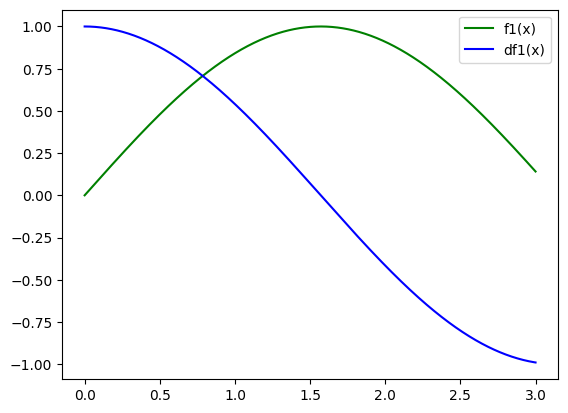

In [ ]:
x1, xn = 0, 3
xs = np.array(np.linspace(x1, xn, 1000))

ax = plt.plot(xs, f1(xs), 'g')
ax = plt.plot(xs, df1(xs), 'b')
plt.legend(['f1(x)', 'df1(x)'])
plt.show()

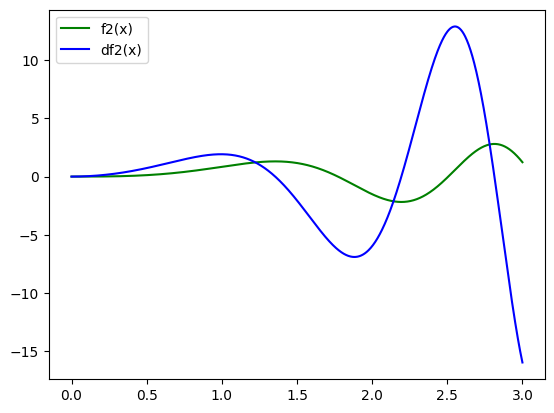

In [7]:
ax = plt.plot(xs, f2(xs), 'g')
ax = plt.plot(xs, df2(xs), 'b')
plt.legend(['f2(x)', 'df2(x)'])
plt.show()

Для каждого алгоритма и размера сетки вычислим производные в точках сетки аналитически и алгоритмически. Вычислим среднеквадратическое отклонение. Построим зависимость среднеквадратического отклонения от размера сетки.

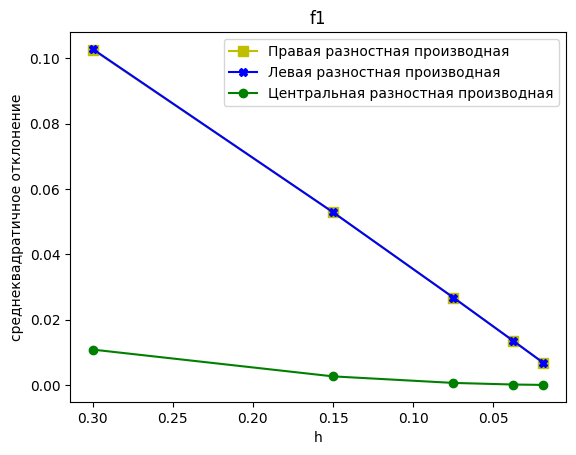

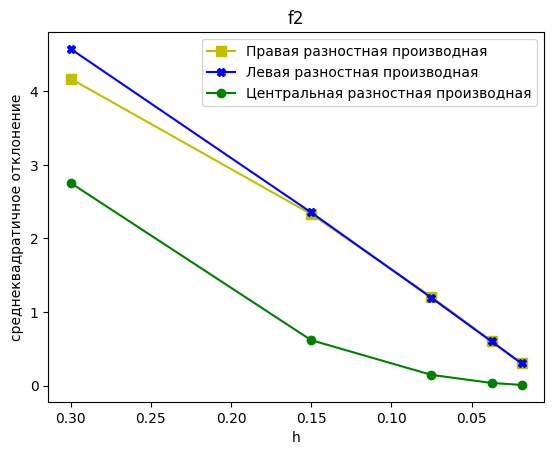

In [16]:
ns = [10, 20, 40, 80, 160]
hs = [(xn - x1) / n for n in ns]
x_ranges = [np.linspace(x1, xn, n) for n in ns]

def method_standard_deviation(y_pred, y_true):
    return sqrt(np.mean(np.square(y_true - y_pred)))

methods = {
    'Правая разностная производная': right_dif_derivative,
    'Левая разностная производная': left_dif_derivative,
    'Центральная разностная производная': three_points_derivative
}

for f_num, (f, df) in enumerate(zip([f1, f2], [df1, df2]), start=1):    
    standard_deviations = {}    

    for method_name, get_derivative in methods.items():
        standard_deviations[method_name] = []
        for n, h, xs in zip(ns, hs, x_ranges):
            standard_deviations[method_name].append(
                method_standard_deviation([get_derivative(f, x, h) for x in xs], df(xs)))
    
    colors = iter(['y', 'b', 'g'])
    markers = iter(['s', 'X', 'o'])
    marker_sizes = iter([7, 6, 6])
    method_names = standard_deviations.keys()
    for method_name in method_names:
        ax = plt.plot(hs, standard_deviations[method_name], next(colors), marker=next(markers), markersize=next(marker_sizes))
    plt.title(f'f{f_num}')
    plt.gca().invert_xaxis()
    plt.xlabel('h')
    plt.ylabel('среднеквадратичное отклонение')
    plt.legend(method_names)
    plt.show()

Численное интегрирование

Вычислим интеграл для двух взятых функций аналитически

$ \int{sin(x)} = -cos(x) $

$ \int{xsin(x^2)} = -\frac{cos(x^2)}{2} $

In [18]:
int_f1 = np.vectorize(lambda x: -cos(x))
int_f2 = np.vectorize(lambda x: -cos(x**2)/2)

Сравним результат численного интегрирования методом прямоугольников с аналитическим для h = 0.1




In [20]:
calc_value = sum([rectangle_integral(f1, x, 0.1) for x in np.linspace(x1, xn, int((xn-x1)/0.1))])
true_value = int_f1(xn) - int_f1(x1)
print(f'Численно расчитанное значение для f1: {round(calc_value, 3)}')
print(f'Аналитически расчитанное значение для f1: {round(true_value, 3)}\n')

calc_value = sum([rectangle_integral(f2, x, 0.1) for x in np.linspace(x1, xn, int((xn-x1)/0.1))])
true_value = int_f2(xn) - int_f2(x1)
print(f'Численно расчитанное значение для f2: {round(calc_value, 3)}')
print(f'Аналитически расчитанное значение для f2: {round(true_value, 3)}')

Численно расчитанное значение для f1: 1.92
Аналитически расчитанное значение для f1: 1.99

Численно расчитанное значение для f2: 0.933
Аналитически расчитанное значение для f2: 0.956


Метод трапеций




In [23]:
calc_value = sum([trapezoid_integral(f1, x, 0.1) for x in np.linspace(x1, xn, int((xn-x1)/0.1))])
true_value = int_f1(xn) - int_f1(x1)
print(f'Численно расчитанное значение для f1: {round(calc_value, 3)}')
print(f'Аналитически расчитанное значение для f1: {round(true_value, 3)}\n')

calc_value = sum([trapezoid_integral(f2, x, 0.1) for x in np.linspace(x1, xn, int((xn-x1)/0.1))])
true_value = int_f2(xn) - int_f2(x1)
print(f'Численно расчитанное значение для f2: {round(calc_value, 3)}')
print(f'Аналитически расчитанное значение для f2: {round(true_value, 3)}')

Численно расчитанное значение для f1: 1.917
Аналитически расчитанное значение для f1: 1.99

Численно расчитанное значение для f2: 0.913
Аналитически расчитанное значение для f2: 0.956


Метод Сипсона




In [24]:
calc_value = sum([simpson_itnegral(f1, x, 0.1) for x in np.linspace(x1, xn, int((xn-x1)/0.1))])
true_value = int_f1(xn) - int_f1(x1)
print(f'Численно расчитанное значение для f1: {round(calc_value, 3)}')
print(f'Аналитически расчитанное значение для f1: {round(true_value, 3)}\n')

calc_value = sum([simpson_itnegral(f2, x, 0.1) for x in np.linspace(x1, xn, int((xn-x1)/0.1))])
true_value = int_f2(xn) - int_f2(x1)
print(f'Численно расчитанное значение для f2: {round(calc_value, 3)}')
print(f'Аналитически расчитанное значение для f2: {round(true_value, 3)}')

Численно расчитанное значение для f1: 1.919
Аналитически расчитанное значение для f1: 1.99

Численно расчитанное значение для f2: 0.926
Аналитически расчитанное значение для f2: 0.956


Для каждого алгоритма и размера сетки вычислим определенный интеграл на выбранном промежутке аналитически и алгоритмически. Вычислим отклонение. Построим зависимость полученного отклонения от размера сетки.

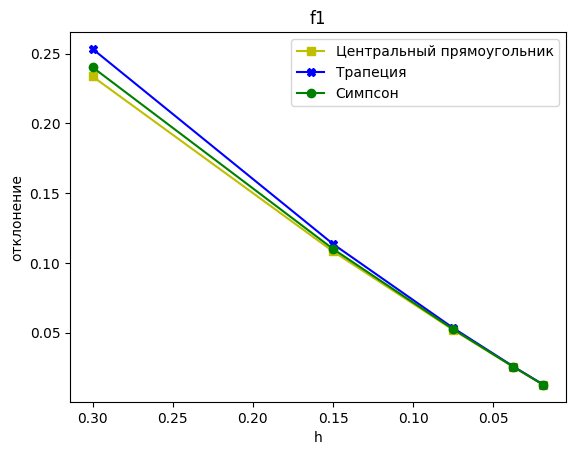

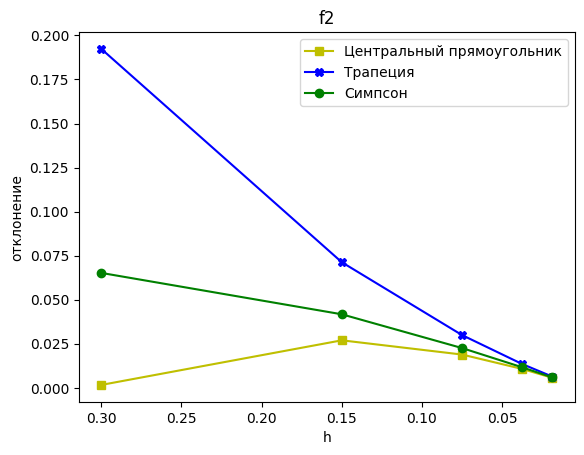

In [29]:
for f_num, (f, int_f) in enumerate(zip([f1, f2], [int_f1, int_f2]), start=1):  
    errors = {}    

    methods = {
        'Центральный прямоугольник': rectangle_integral,
        'Трапеция': trapezoid_integral,
        'Симпсон': simpson_itnegral
    }

    for method_name, get_integral in methods.items():
        errors[method_name] = []
        for n, h, xs in zip(ns, hs, x_ranges):
            calc_value = sum([get_integral(f, x, h) for x in xs])
            true_value = int_f(xn) - int_f(x1)
            errors[method_name].append(
                abs(calc_value - true_value)
            )
    
    colors = iter(['y', 'b', 'g'])
    markers = iter(['s', 'X', 'o'])
    method_names = errors.keys()
    for method_name in method_names:
        ax = plt.plot(hs, errors[method_name], next(colors), marker=next(markers))
    plt.title(f'f{f_num}')
    plt.gca().invert_xaxis()
    plt.xlabel('h')
    plt.ylabel('отклонение')
    plt.legend(method_names)
    plt.show()